In [62]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from typing import Any

In [7]:
df_1 = pd.read_csv("dataset/dataset_1_20000.csv", error_bad_lines=False);
df_2 = pd.read_csv("dataset/dataset_20001_40000.csv", error_bad_lines=False);
df_3 = pd.read_csv("dataset/dataset_40001_60000.csv", error_bad_lines=False);
df_4 = pd.read_csv("dataset/dataset_60001_80000.csv", error_bad_lines=False);
df_5 = pd.read_csv("dataset/dataset_80001_100000.csv", error_bad_lines=False);

b'Skipping line 14497: expected 41 fields, saw 43\nSkipping line 14498: expected 41 fields, saw 43\nSkipping line 14499: expected 41 fields, saw 43\nSkipping line 14500: expected 41 fields, saw 43\nSkipping line 14501: expected 41 fields, saw 43\nSkipping line 14502: expected 41 fields, saw 43\nSkipping line 14503: expected 41 fields, saw 43\nSkipping line 14504: expected 41 fields, saw 43\nSkipping line 14505: expected 41 fields, saw 43\nSkipping line 14506: expected 41 fields, saw 43\nSkipping line 14662: expected 41 fields, saw 43\nSkipping line 14663: expected 41 fields, saw 43\nSkipping line 14664: expected 41 fields, saw 43\n'
/Users/bregy/.pyenv/versions/3.9.0/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (10,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
b'Skipping line 5582: expected 41 fields, saw 42\nSkipping line 5583: expected 41 

In [58]:
complete_df = df_1.append(df_2).append(df_3).append(df_4).append(df_5)

In [63]:
def valid_datum(x: Any) -> bool:
    if pd.isna(x):
        return False
    
    return x.replace(".","",1).isdigit()

In [65]:
peru_libre_valids = "partido_politico_nacional_peru_libre_total_valids"
complete_df = complete_df[complete_df[peru_libre_valids].astype(pd.StringDtype()).apply(valid_datum)]
complete_df[peru_libre_valids] = complete_df[peru_libre_valids].astype(pd.StringDtype()).astype(pd.Float64Dtype())

fuerza_popular_valids = "fuerza_popular_total_valids"
complete_df = complete_df[complete_df[fuerza_popular_valids].astype(pd.StringDtype()).apply(valid_datum)]
complete_df[fuerza_popular_valids] = complete_df[fuerza_popular_valids].astype(pd.StringDtype()).astype(pd.Float64Dtype())

In [32]:
mask = peru_libre_valids.astype(pd.StringDtype()).apply(lambda x: x.replace(".","",1).isdigit())
peru_libre_valids[mask]

0        59.296
1        58.571
2        62.564
3        59.545
4        52.970
          ...  
19982    32.609
19983    33.906
19984    36.818
19985    45.045
19986    33.186
Name: partido_politico_nacional_peru_libre_total_valids, Length: 19986, dtype: object

<AxesSubplot:>

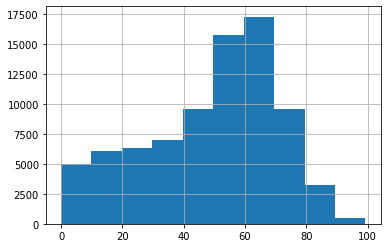

In [67]:
complete_df[fuerza_popular_valids].hist()

<AxesSubplot:>

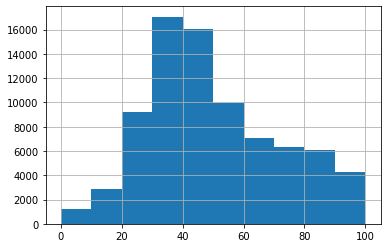

In [68]:
complete_df[peru_libre_valids].hist()

0        4
1        4
2        3
3        4
4        4
        ..
19982    6
19983    6
19984    6
19985    5
19986    6
Name: fuerza_popular_total_valids, Length: 19986, dtype: int64

(array([ 4988.,  6055.,  6380.,  7006.,  9668., 16228., 17189.,  9225.,
         2951.,   417.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

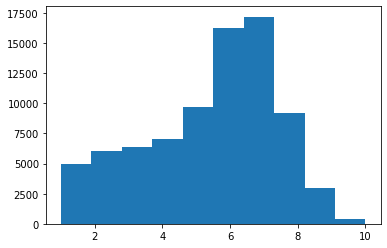

In [73]:
plt.hist(np.floor(complete_df[fuerza_popular_valids]/10+1).astype(int))

(array([ 1192.,  2893.,  9232., 17066., 16051.,  9937.,  7063.,  6356.,
         6085.,  4232.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

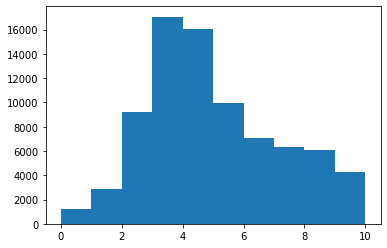

In [74]:
plt.hist(np.floor(complete_df[peru_libre_valids]/10).astype(int))